## Telco Customer Churn Analysis - Descriptive 

The data set includes information about:

- Customers who left within the last month – the column is called Churn


- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
%load_ext watermark
%watermark -d -u -a '<Micaela>' -v -p numpy

<Micaela> 
last updated: 2021-01-05 

CPython 3.8.5
IPython 7.19.0

numpy 1.19.2


**Exploratory Data Analysis (EDA)**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
mydata = pd.read_csv("Telco_Customers.csv")

In [4]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
mydata.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,0784-ZQJZX,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Observations:
- Lost approx. 27% of clients 

Goals: 
- Get general information on customers
- Observe differences between customers that left and stayed
- Determine which alogorithm will most accurately predict a customer leaving

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Tenure**

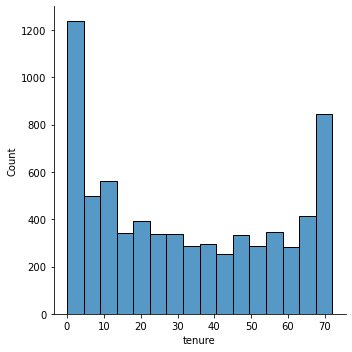

In [7]:
ten_dist = sns.displot(mydata['tenure'])
ten_dist

Observations:

Top 2 customer groups

- 0-5 months
- ~67-72 months

Text(0.5, 1.0, 'Tenure Boxplot')

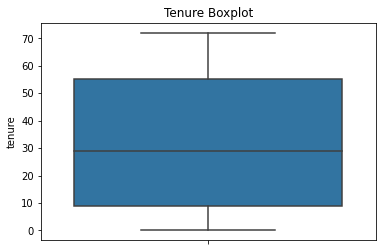

In [8]:
tenure_plot = sns.boxplot(y = "tenure", data = mydata)
tenure_plot.set_title('Tenure Boxplot')

Observations:
- 50% of customers are with Telco between 10-55 months 
- Typical customer is with Telco for 30 months 

Text(0.5, 1.0, 'Tenure vs Churn')

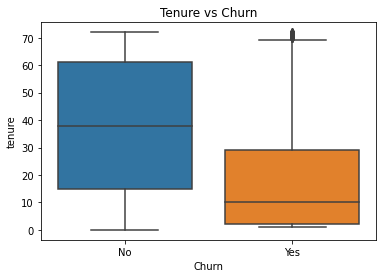

In [9]:
ten_vs_churn = sns.boxplot(x = "Churn", y = "tenure", data = mydata)
ten_vs_churn.set_title('Tenure vs Churn')

Observations:
- 75% of customers that churn are with Telco for 30 months or less
- Typical customer thst churned was with the company for 10 months

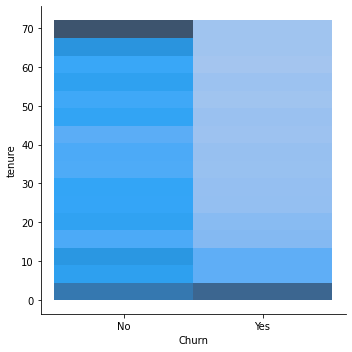

In [10]:
## want sns.distplot for churn == no and churn == yes 
sns.displot(x = "Churn", y = "tenure", data = mydata)

Observations:
- Customers that stay most frequently: 67-70 monthts 
- Customers that leave most frequently: <6 months

**Monthly Charges**

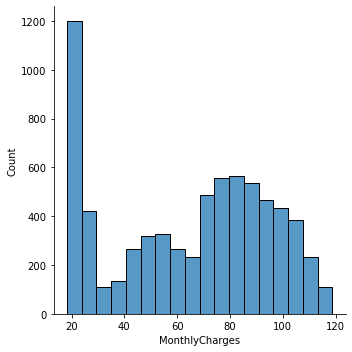

In [11]:
sns.displot(mydata['MonthlyCharges'])

Text(0.5, 1.0, 'Monthly Charges Boxplot')

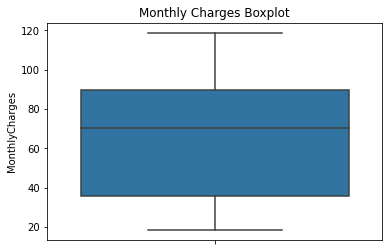

In [12]:
MonthlyCharges_plot = sns.boxplot(y = "MonthlyCharges", data = mydata)
MonthlyCharges_plot.set_title('Monthly Charges Boxplot')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

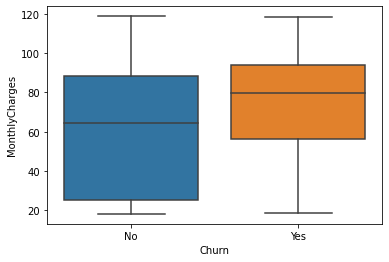

In [13]:
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = mydata)

Observations: 
- Typical customer that churned pays more than the typical customer that stayed

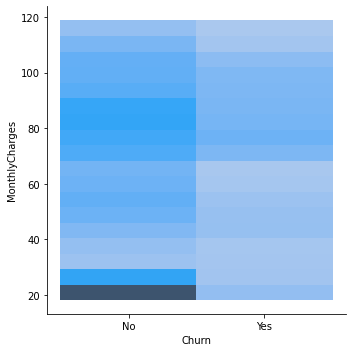

In [14]:
sns.displot(x = "Churn", y = "MonthlyCharges", data = mydata)

Observations: 
- Most frequent amount paid by customers that stayed: 18.25 - 25